In [1]:
!pip install -U tensorflow_datasets

In [2]:
from __future__ import absolute_import,division ,print_function
import tensorflow as tf
import tensorflow_datasets as tfda
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

# IMPORTING THE DATASET

In [3]:
dataset,metadata=tfda.load('fashion_mnist', as_supervised=True,with_info=True)
train_dataset ,test_dataset =dataset['train'],dataset['test']

In [4]:
class_name=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# DATASET VISUALIZATION

In [5]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Number of training examples:{}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))


Number of training examples:60000
Number of testing examples: 10000


# Preprocessing the data 

In [6]:
def normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels

In [7]:
# Then Map function will be used to each element in train and test dataset 
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)


# Plot The Data 

In [8]:
# Take a single image and remove color dimension by reshaping 
for image,label in test_dataset.take(1):
    break
image=image.numpy().reshape((28,28))


# Plot The image 

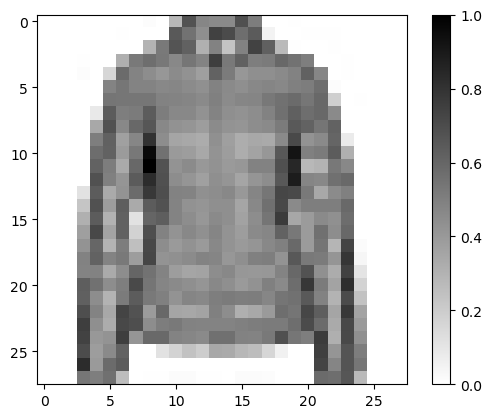

In [9]:
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

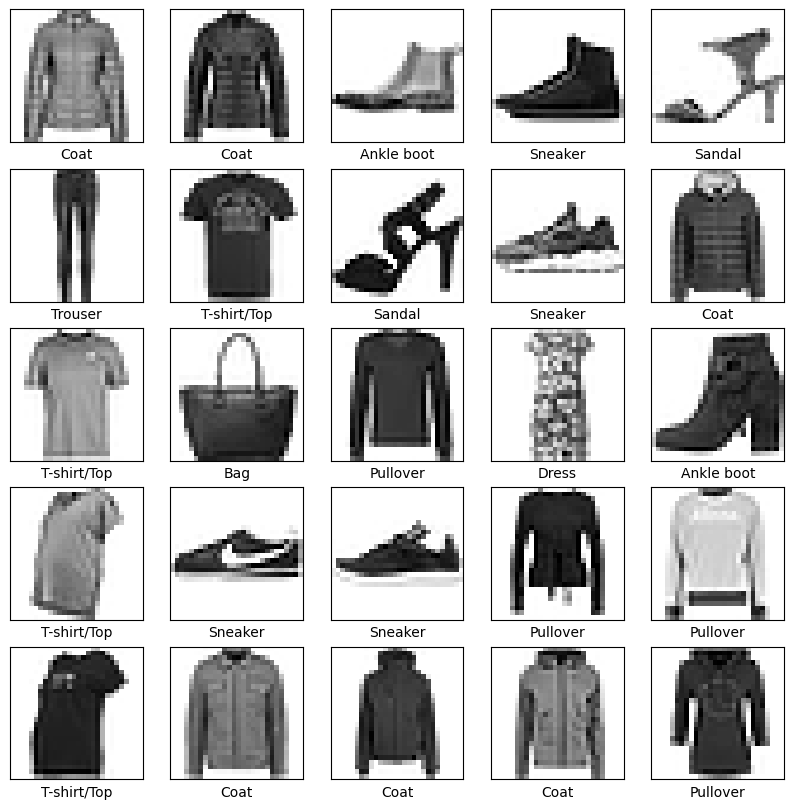

In [10]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_name[label])
    i+=1
plt.show()    

# Build the model 

In [11]:
model=tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(126,activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     
])


# Compile the model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5



1875/1875 [==============================] - 5s 2ms/step - loss: 0.4950 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8872
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8894


# Evaluate The test dataset

In [16]:
test_loss, test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy  on test dataset:',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8668
Accuracy  on test dataset: 0.8668000102043152


# make predictions 

In [17]:
for test_images,test_labels in test_dataset.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()
predictions=model.predict(test_images)

1/1 [==============================] - 0s 67ms/step


In [18]:
predictions.shape

(32, 10)

In [19]:
predictions[0]

array([9.6967931e-05, 7.0256337e-06, 3.0582342e-02, 1.0720707e-06,
       8.8211292e-01, 2.1570489e-08, 8.7197185e-02, 2.9980035e-10,
       2.4829189e-06, 2.3173932e-10], dtype=float32)

In [20]:
np.argmax(predictions[0])

4

In [21]:
test_labels[0]

4

In [33]:
def plot_image(i,predictions_array,true_labels,images):
    predictions_array,true_label,img=predictions_array[i],true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[...,0],cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],100*np.max(predictions_array),class_name[true_label]),
              color=color)    
    


In [34]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

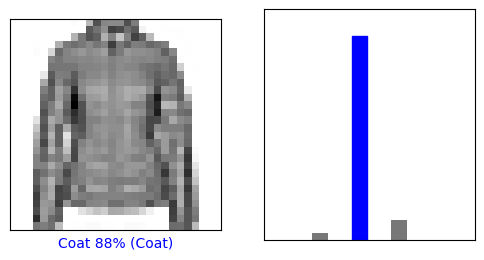

In [36]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

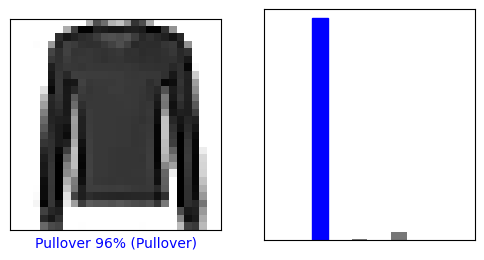

In [38]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

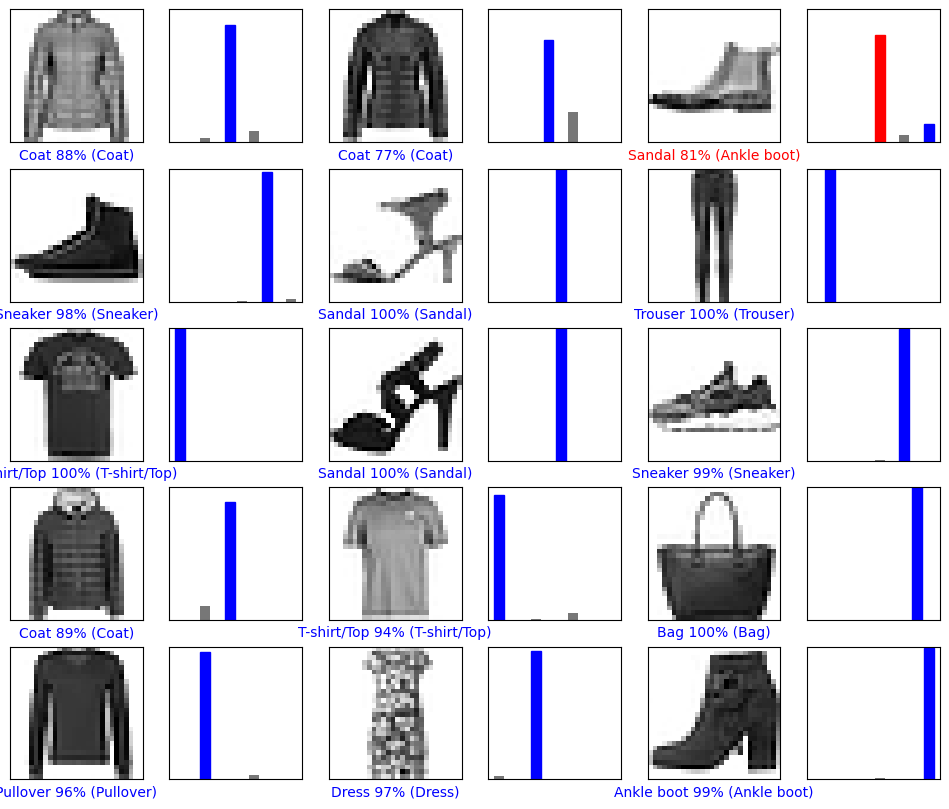

In [39]:
# Plot the first X first images ,their predicted_label,and the true label
# color correct predictions in blue,incorrect predictions in red 
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels )

In [ ]:
## Add the image to a batch where its the only member 
img=test_images[0]
print(img.shape)

In [41]:
img=np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [43]:
predictions_single=model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[9.6967851e-05 7.0256269e-06 3.0582314e-02 1.0720728e-06 8.8211298e-01
  2.1570408e-08 8.7197118e-02 2.9980038e-10 2.4829119e-06 2.3173889e-10]]


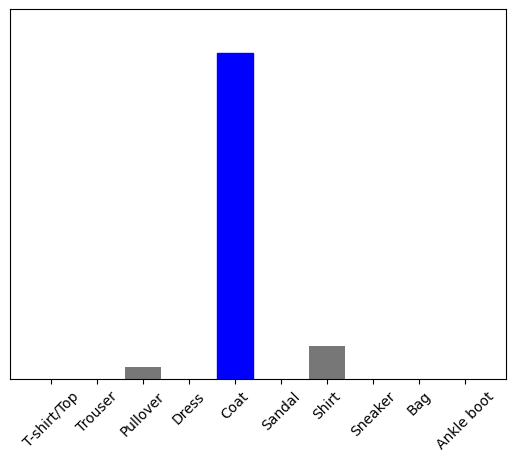

In [44]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_name,rotation=45)


In [46]:
np.argmax(predictions_single[0])

4